## introduction


### Main questions

##### Importing Libraries


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import geom
from scipy.stats import ttest_ind
import seaborn as sns;

##### Loading Data


In [2]:
ds = pd.read_csv("~/ironhack_coding/datasets/speed-dating-experiment/speed_dating_data.csv", encoding = "Latin 1")

##### Exploring Data

In [3]:
ds.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [4]:
ds.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
ds.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [6]:
ds.shape

(8378, 195)

In [7]:
# creating new dataset and changing column names
ds2 = ds[["iid","gender","round", "order", "match", "int_corr", "date", "attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1"]]
ds2.columns =  ["participant_id","gender","people_met","order", "match", "int_corr","date_freq","self_attractive","self_sincere","self_intelligent","self_fun","self_ambitious"]

ds2.head()

,participant_id,gender,people_met,order,match,int_corr,date_freq,self_attractive,self_sincere,self_intelligent,self_fun,self_ambitious
0,1,0,10,4,0,0.14,7.0,NaN,NaN,NaN,NaN,NaN
1,1,0,10,3,0,0.54,7.0,NaN,NaN,NaN,NaN,NaN
2,1,0,10,10,1,0.16,7.0,NaN,NaN,NaN,NaN,NaN
3,1,0,10,5,1,0.61,7.0,NaN,NaN,NaN,NaN,NaN
4,1,0,10,7,1,0.21,7.0,NaN,NaN,NaN,NaN,NaN


### Who got a match and who didn't

In [8]:
# Calculating how many matches each participant had

match_no = pd.pivot_table(ds2, index = "participant_id", values = "match", aggfunc = np.sum)

match_no.head()


,match
participant_id,
1,4
2,2
3,0
4,2
5,2


#### Likelihood of finding at least a match when participating in a datespeeding event

In [9]:
# distribution 
match_no["match"].value_counts(normalize = True).reset_index().sort_values(by = 'index')#.plot(x = 'index', y = 'match')

,index,match
2,0,0.179673
0,1,0.226860
1,2,0.212341
3,3,0.116152
4,4,0.081670
5,5,0.070780
6,6,0.043557
8,7,0.023593
7,8,0.030853
9,9,0.005445


In [10]:
# probability of getting at least one match

total = len(match_no)
with_match = total - 99

result = with_match / total
result*100

# there are 

82.03266787658802

#### Answer


If you go to a speed dating event there is a 82% chance of getting at least one match

### Does order have an impact in the likelihood of finding a match ?

In [11]:
# how many people usually attend this type of events

ds2["people_met"].value_counts(normalize=True)#.reset_index().sort_values(by = 'index')#.plot(x = 'index', y = 'match')#*100

# most events have 18 attendants. I will use this as sample to calculate 


18    0.161136
20    0.138458
22    0.115541
21    0.105276
10    0.105037
16    0.097398
19    0.077107
14    0.063500
15    0.053712
9     0.030079
6     0.019336
11    0.016710
5     0.005968
8     0.005729
7     0.005013
Name: people_met, dtype: float64

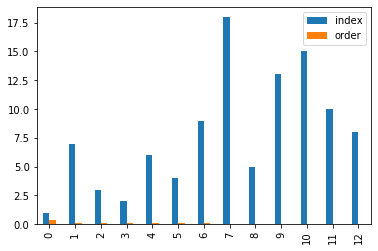

In [12]:
#ds2.loc[ds2[(ds2.match == 1) & (ds2.people_met == 18)].groupby('participant_id')['order'].idxmin()]["order"].value_counts(normalize = True)#.hist()
ds2.loc[ds2[(ds2.match == 1) & (ds2.people_met == 18)].groupby('participant_id')['order'].idxmin()]["order"].value_counts(normalize = True).reset_index().plot(kind="bar")
# reset index and plot






In [13]:
order = ds2.loc[ds2[(ds2.match == 1) & (ds2.people_met == 18)].groupby('participant_id')['order'].idxmin()]["order"].value_counts(normalize = True).reset_index()
order = order.rename(columns={"index":"person_number", "order":"percentage"})
#order.hist(column ="person_number")
order


,person_number,percentage
0,1,0.333333
1,7,0.130435
2,3,0.086957
3,2,0.086957
4,6,0.072464
5,4,0.072464
6,9,0.057971
7,18,0.043478
8,5,0.043478
9,13,0.028986


In [14]:
order_sorted = order.sort_values("person_number").reset_index(drop=True)

In [15]:
order_sorted

,person_number,percentage
0,1,0.333333
1,2,0.086957
2,3,0.086957
3,4,0.072464
4,5,0.043478
5,6,0.072464
6,7,0.130435
7,8,0.014493
8,9,0.057971
9,10,0.014493


In [16]:
to_add = [11, 12, 14, 16, 17]
for i,j in enumerate(to_add):
    order_sorted.loc[i+13] = [j, 0]
    

In [17]:
order_sorted = order_sorted.sort_values("person_number").reset_index(drop=True)

In [18]:
order_sorted

,person_number,percentage
0,1,0.333333
1,2,0.086957
2,3,0.086957
3,4,0.072464
4,5,0.043478
5,6,0.072464
6,7,0.130435
7,8,0.014493
8,9,0.057971
9,10,0.014493


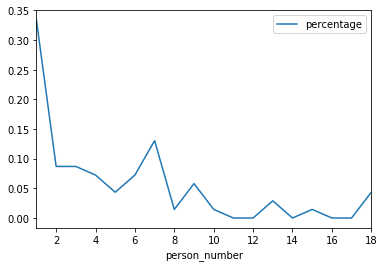

In [19]:
order_sorted.plot(x='person_number', y='percentage')

In [20]:
# you are more likely to get a match at the beginning or right at the end

In [22]:
# values for expected values for chi square
x = geom(np.mean(order_sorted.percentage)) 
expected_values = x.pmf(range(0,18))
print(expected_values)

[0.         0.05555556 0.05246914 0.04955418 0.04680117 0.04420111
 0.04174549 0.0394263  0.03723595 0.03516728 0.03321355 0.03136835
 0.02962566 0.02797979 0.02642536 0.02495728 0.02357077 0.02226128]


In [23]:
# observed values for chi square
observed_values = np.array(order_sorted["percentage"])
observed_values

array([0.33333333, 0.08695652, 0.08695652, 0.07246377, 0.04347826,
       0.07246377, 0.13043478, 0.01449275, 0.05797101, 0.01449275,
       0.        , 0.        , 0.02898551, 0.        , 0.01449275,
       0.        , 0.        , 0.04347826])

#### Goodness of Fit with  Chi Square

In [24]:
print(len(observed_values))
print(len(expected_values))

18
18


In [26]:
from scipy.stats import chi2
chi = sum((observed_values - expected_values)**2 / expected_values)   # fill with code and data
dof = 98 #degree of freedom, n -1
alpha = 0.05

#ppf is the inverse of cdf
# the critical value is the point at whih we have the conf level ( 1 - alpha = 95)


critical_value = chi2.ppf(q = 1 - alpha, df = dof)   # ppf: Percent Point Function
print("Null hypothesis rejected") if critical_value < chi else print("Null hypothesis can't be rejected")

Null hypothesis rejected


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
# I have to reject my previous result of the percentage of finding your match at first is 0.05


### Dating frequency and likelihood of getting a match - correlation

Codebook

How frequently do you go on dates ?
- Several times a week (1)
- Twice a week (2)
- Once a week(3)
- Twice a month (4)
- Once a month (5)
- Several times a year (6)
- Almost never (7)

In [27]:
date_freq_match = pd.pivot_table(ds2, index = "date_freq", values = ["match"], aggfunc = {"match":np.sum}).reset_index()

date_freq_match.corr()



,date_freq,match
date_freq,1.000000,0.698577
match,0.698577,1.000000


In [28]:
X = date_freq_match['date_freq']
Y = date_freq_match['match']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y) 
slope

38.9642857142857

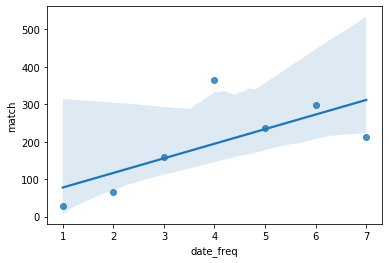

In [31]:
sns.regplot(x="date_freq", y="match", data = date_freq_match)

In [ ]:
0.69**2
# the date frequency influences 47% the likelihood of havng a match
# the more date frequency more matches

### Self esteem and matches

##### Defining 

In [63]:
self_confidence = pd.pivot_table(ds2, index = "participant_id", values = ["match","self_attractive","self_sincere",
                                                                   "self_intelligent", "self_fun","self_ambitious"],
                                                                   aggfunc = {"match": np.sum, 
                                                                              "self_attractive":np.mean,
                                                                             "self_sincere": np.mean, 
                                                                              "self_intelligent":np.mean,
                                                                             "self_fun":np.mean,
                                                                             "self_ambitious":np.mean})

# drop Nan Values of certain rows

print(len(self_confidence))
self_confidence.dropna(axis = 0, how="any", inplace = True)
print(len(self_confidence))

# filter with match and no match

confidence_with_match = self_confidence[(self_confidence.match >= 1)]
confidence_without_match = self_confidence[(self_confidence.match == 0)]

# summing all rows but number of match

confidence_with_match["self_confidence_points"] = confidence_with_match.iloc[:,1:].sum(axis=1)
confidence_without_match["self_confidence_points"] = confidence_without_match.iloc[:,1:].sum(axis=1)


551
314


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
confidence_with_match.corr()

,match,self_ambitious,self_attractive,self_fun,self_intelligent,self_sincere,self_confidence_points
match,1.000000,0.067341,-0.004889,0.096697,0.005581,0.004469,0.055789
self_ambitious,0.067341,1.000000,0.294725,0.290201,0.496026,0.269134,0.721034
self_attractive,-0.004889,0.294725,1.000000,0.348224,0.286350,0.187516,0.623809
self_fun,0.096697,0.290201,0.348224,1.000000,0.219288,0.237687,0.651104
self_intelligent,0.005581,0.496026,0.286350,0.219288,1.000000,0.422850,0.697113
self_sincere,0.004469,0.269134,0.187516,0.237687,0.422850,1.000000,0.634161
self_confidence_points,0.055789,0.721034,0.623809,0.651104,0.697113,0.634161,1.000000


In [59]:
confidence_without_match.corr()

,match,self_ambitious,self_attractive,self_fun,self_intelligent,self_sincere
match,NaN,NaN,NaN,NaN,NaN,NaN
self_ambitious,NaN,1.000000,0.512915,0.530815,0.437569,0.111427
self_attractive,NaN,0.512915,1.000000,0.630043,0.528671,0.130107
self_fun,NaN,0.530815,0.630043,1.000000,0.355176,0.214573
self_intelligent,NaN,0.437569,0.528671,0.355176,1.000000,0.422006
self_sincere,NaN,0.111427,0.130107,0.214573,0.422006,1.000000


In [60]:
# mean of confidence of those who got a match
confidence_with_match["self_confidence_points"].mean()

38.219607843137254

In [64]:
confidence_without_match["self_confidence_points"].mean()

37.6271186440678

In [ ]:
# calculating t test for independent variables

In [83]:
# checking lenghts for t test
print("lenght", len(confidence_with_match))
print("lenght", len(confidence_without_match))

# get sample with 59 rows for t test (or could drop ramdomly)
sample = confidence_with_match.sample(59)

# null hypothesis is that people whose self perception is good get the same 
# amount of matches that those who don't

alpha = 0.05
stat, p = ttest_ind(sample.match, confidence_without_match.match)#, #equal_var=False)



# interpret via p-value
if p > alpha:
    print('We cannot reject the null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

lenght 255
lenght 59
Reject the null hypothesis that the means are equal.


In [82]:
# TO CSV to use in tableau
# match_no.to_csv("match_number.csv")
# order_sorted.to_csv("order_sorted.csv")
# date_freq_match.to_csv("date_freq_match.csv")
# self_confidence.to_csv("self_confidence.csv")
p

2.9090142898228045e-22